<a href="https://colab.research.google.com/github/cclmcesarschool/RNA-e-Deep-Learning---CESAR-School-2023.2/blob/main/Atividade2.2/LinearRegressionIrisNumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carlos Cezar Lopes de Mendonça

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt   # para plotting


from sklearn.datasets import load_iris  # para carregar dataset

import numpy as np  # processamento matricial

np.random.seed(1234)

In [ ]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1]
y_train = data[:,1:2]

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float64
y_train.shape: (50, 1) float64
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


In [ ]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()

Text(0, 0.5, 'Comprimento petalas')

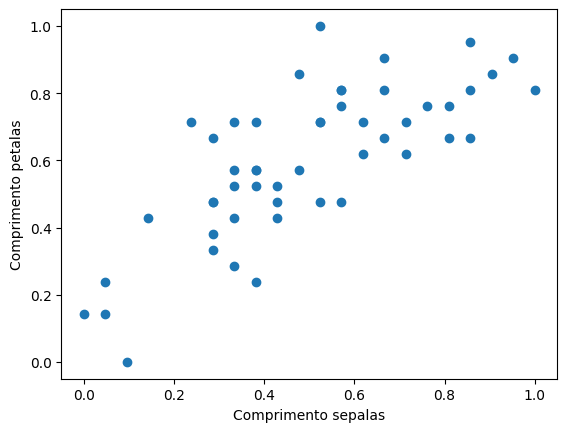

In [ ]:
plt.scatter(x_train,y_train)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')

In [ ]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [ ]:
x_train_bias

array([[1.        , 1.        ],
       [1.        , 0.71428571],
       [1.        , 0.95238095],
       [1.        , 0.28571429],
       [1.        , 0.76190476],
       [1.        , 0.38095238],
       [1.        , 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.80952381],
       [1.        , 0.14285714],
       [1.        , 0.04761905],
       [1.        , 0.47619048],
       [1.        , 0.52380952],
       [1.        , 0.57142857],
       [1.        , 0.33333333],
       [1.        , 0.85714286],
       [1.        , 0.33333333],
       [1.        , 0.42857143],
       [1.        , 0.61904762],
       [1.        , 0.33333333],
       [1.        , 0.47619048],
       [1.        , 0.57142857],
       [1.        , 0.66666667],
       [1.        , 0.57142857],
       [1.        , 0.71428571],
       [1.        , 0.80952381],
       [1.        , 0.9047619 ],
       [1.        , 0.85714286],
       [1.        , 0.52380952],
       [1.        , 0.38095238],
       [1.

In [ ]:
class Net():
    def __init__(self, n_in, n_out):
        self.w = np.random.uniform(-0.1,0.1,(n_out,n_in)) #inicialização dos parâmetros

    def forward(self, x_bias):
        return x_bias.dot(self.w.T)

In [ ]:
model = Net(2,1) # duas entradas (1 + x0) e uma saída y_pred

In [ ]:
xin = np.random.randn(4,2) # 4 amostras, 2 entradas (1 + x0)
ypred = model.forward(xin)
ypred

array([[-0.09602795],
       [ 0.0661236 ],
       [-0.06857828],
       [-0.05573871]])

In [ ]:

num_epochs = 100
learning_rate = 0.5
for epoch in range(num_epochs):

    # forward - predict
    y_pred = model.forward(x_train_bias)

    #loss cálculo da função de perda
    loss = np.square(y_pred - y_train).mean()

    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0/n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)

    # gradiente descendente
    model.w = model.w - learning_rate * w_grad.T

    # verbose
    if (epoch+1) % 1 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))

Epoch[1/100], loss: 0.469163
Epoch[2/100], loss: 0.058070
Epoch[3/100], loss: 0.030543
Epoch[4/100], loss: 0.028105
Epoch[5/100], loss: 0.027364
Epoch[6/100], loss: 0.026787
Epoch[7/100], loss: 0.026269
Epoch[8/100], loss: 0.025799
Epoch[9/100], loss: 0.025373
Epoch[10/100], loss: 0.024986
Epoch[11/100], loss: 0.024634
Epoch[12/100], loss: 0.024315
Epoch[13/100], loss: 0.024025
Epoch[14/100], loss: 0.023762
Epoch[15/100], loss: 0.023524
Epoch[16/100], loss: 0.023307
Epoch[17/100], loss: 0.023110
Epoch[18/100], loss: 0.022931
Epoch[19/100], loss: 0.022769
Epoch[20/100], loss: 0.022622
Epoch[21/100], loss: 0.022488
Epoch[22/100], loss: 0.022366
Epoch[23/100], loss: 0.022256
Epoch[24/100], loss: 0.022156
Epoch[25/100], loss: 0.022065
Epoch[26/100], loss: 0.021983
Epoch[27/100], loss: 0.021908
Epoch[28/100], loss: 0.021840
Epoch[29/100], loss: 0.021778
Epoch[30/100], loss: 0.021722
Epoch[31/100], loss: 0.021671
Epoch[32/100], loss: 0.021625
Epoch[33/100], loss: 0.021583
Epoch[34/100], loss

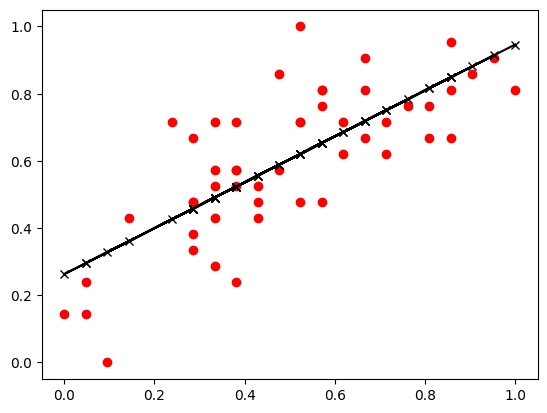

In [ ]:
y_pred = model.forward(x_train_bias)
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, y_pred, 'kx-', label='Fitting Line')

In [ ]:
print(model.w)

[[0.26295353 0.68335641]]


In [ ]:
loss = np.square(y_pred - y_train).mean()
loss


0.02117000379151052

In [ ]:
x = x_train_bias
y = y_train
w_opt = (np.linalg.inv((x.T).dot(x)).dot(x.T)).dot(y)
print(w_opt.T)

[[0.26134159 0.68646976]]


In [ ]:
model = Net(2,1)

perdas = []

num_epochs = 100
learning_rate = 0.5
for epoch in range(num_epochs):

    # forward - predict
    y_pred = model.forward(x_train_bias)

    #loss cálculo da função de perda
    loss = np.square(y_pred - y_train).mean()

    # cálculo do gradiente pelas derivadas parciais
    w_grad = (2.0/n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)

    # gradiente descendente
    model.w = model.w - learning_rate * w_grad.T

    # verbose
    if (epoch+1) % 1 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))

Epoch[1/100], loss: 0.339831
Epoch[2/100], loss: 0.050684
Epoch[3/100], loss: 0.031016
Epoch[4/100], loss: 0.029003
Epoch[5/100], loss: 0.028210
Epoch[6/100], loss: 0.027556
Epoch[7/100], loss: 0.026968
Epoch[8/100], loss: 0.026434
Epoch[9/100], loss: 0.025949
Epoch[10/100], loss: 0.025509
Epoch[11/100], loss: 0.025109
Epoch[12/100], loss: 0.024746
Epoch[13/100], loss: 0.024417
Epoch[14/100], loss: 0.024118
Epoch[15/100], loss: 0.023846
Epoch[16/100], loss: 0.023600
Epoch[17/100], loss: 0.023376
Epoch[18/100], loss: 0.023173
Epoch[19/100], loss: 0.022988
Epoch[20/100], loss: 0.022821
Epoch[21/100], loss: 0.022669
Epoch[22/100], loss: 0.022531
Epoch[23/100], loss: 0.022405
Epoch[24/100], loss: 0.022291
Epoch[25/100], loss: 0.022188
Epoch[26/100], loss: 0.022094
Epoch[27/100], loss: 0.022009
Epoch[28/100], loss: 0.021932
Epoch[29/100], loss: 0.021862
Epoch[30/100], loss: 0.021798
Epoch[31/100], loss: 0.021740
Epoch[32/100], loss: 0.021687
Epoch[33/100], loss: 0.021640
Epoch[34/100], loss

Quantos parâmetros são treinados nesse modelo? Net(2, 1)
São 3 parametros(os pesos da unidade de entrada e unidade de saida mais o intecepto)

Qual é o número de atributos de entrada para a rede?
2 atributos, o dado de entrada para treinar o modelo, x trais e o bias (o comprimento das sepalas mais o bias que são as colunas de uns, intecepto)

Qual é o número de saídas da rede? 1 unidade de saida.

Suponha que eu tenha agora 5 mil amostras para fazer a predição. Qual é o shape da matriz de entrada? Qual é o shape do matriz de saída?

A matriz de entrada terá o shape (5000, 2) e a matriz de saida terá o shape (5000, 1).

Modifique o laço do treinamento via gradiente descendente para guardar em uma lista, o valor da perda no final de cada época.

Após o treinamento, plote o valor da perda em função da época.
Calcule o valor da perda (MSE) da rede com os parâmetros inicializados, sem serem treinados.

Coloque os valores dos pesos da solução ótima analítica no modelo da rede e calcule o valor da perda (MSE) e compare
com o valor da perda obtida pelo método da otimização via gradiente descendente

In [ ]:
model = Net(2,1)

perdas = []

num_epochs = 100
learning_rate = 0.5
for epoch in range(num_epochs):


    y_pred = model.forward(x_train_bias)


    loss = np.square(y_pred - y_train).mean()

    perdas.append(loss)


    w_grad = (2.0/n_samples) * (x_train_bias.T).dot(x_train_bias.dot(model.w.T) - y_train)


    model.w = model.w - learning_rate * w_grad.T


    if (epoch+1) % 1 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss))


Epoch[1/100], loss: 0.432375
Epoch[2/100], loss: 0.056651
Epoch[3/100], loss: 0.031341
Epoch[4/100], loss: 0.028966
Epoch[5/100], loss: 0.028154
Epoch[6/100], loss: 0.027505
Epoch[7/100], loss: 0.026921
Epoch[8/100], loss: 0.026391
Epoch[9/100], loss: 0.025910
Epoch[10/100], loss: 0.025474
Epoch[11/100], loss: 0.025077
Epoch[12/100], loss: 0.024717
Epoch[13/100], loss: 0.024391
Epoch[14/100], loss: 0.024094
Epoch[15/100], loss: 0.023825
Epoch[16/100], loss: 0.023580
Epoch[17/100], loss: 0.023358
Epoch[18/100], loss: 0.023157
Epoch[19/100], loss: 0.022974
Epoch[20/100], loss: 0.022807
Epoch[21/100], loss: 0.022657
Epoch[22/100], loss: 0.022520
Epoch[23/100], loss: 0.022395
Epoch[24/100], loss: 0.022282
Epoch[25/100], loss: 0.022180
Epoch[26/100], loss: 0.022087
Epoch[27/100], loss: 0.022002
Epoch[28/100], loss: 0.021926
Epoch[29/100], loss: 0.021856
Epoch[30/100], loss: 0.021793
Epoch[31/100], loss: 0.021735
Epoch[32/100], loss: 0.021683
Epoch[33/100], loss: 0.021636
Epoch[34/100], loss

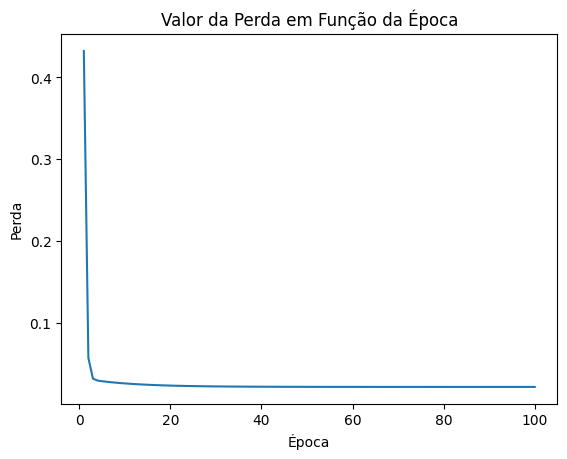

In [ ]:
plt.plot(range(1, num_epochs + 1), perdas)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.title('Valor da Perda em Função da Época')
plt.show()